In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/nba_game_logs_2017_to_2024.csv')

In [4]:
print(df.shape)

(18332, 30)


In [5]:
print(df.head())

   SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME   GAME_ID  \
0      22017  1610612738               BOS         Boston Celtics  21700001   
1      22017  1610612744               GSW  Golden State Warriors  21700002   
2      22017  1610612739               CLE    Cleveland Cavaliers  21700001   
3      22017  1610612745               HOU        Houston Rockets  21700002   
4      22017  1610612753               ORL          Orlando Magic  21700005   

    GAME_DATE      MATCHUP WL  MIN  FGM  ...  REB  AST  STL  BLK  TOV  PF  \
0  2017-10-17    BOS @ CLE  L  240   36  ...   46   24   11    4   12  24   
1  2017-10-17  GSW vs. HOU  L  240   43  ...   41   34    5    9   17  25   
2  2017-10-17  CLE vs. BOS  W  240   38  ...   50   19    3    4   17  25   
3  2017-10-17    HOU @ GSW  W  240   47  ...   43   28    9    5   13  16   
4  2017-10-18  ORL vs. MIA  W  240   43  ...   50   22    8    9   15  18   

   PTS  PLUS_MINUS  VIDEO_AVAILABLE   SEASON  
0   99         

In [6]:
#parsing home vs away
df['IS_HOME']= df['MATCHUP'].apply(lambda x:1 if 'vs.' in x else 0)

In [7]:
#convert win/lose to nums
df['WIN']= df['WL'].apply(lambda x:1 if x== 'W'else 0)

In [8]:
home_win_rate=df[df['IS_HOME'] == 1]['WIN'].mean()

In [9]:
away_win_rate=df[df['IS_HOME'] == 0]['WIN'].mean()

In [10]:
print(f'Home winrate: {home_win_rate:  .2%}')

In [11]:
print(f'Away winrate: {away_win_rate: .2%}')

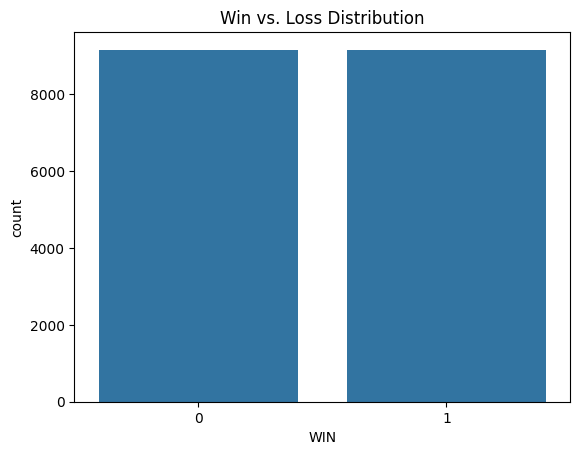

In [26]:
sns.countplot(x='WIN', data=df)
plt.title('Win vs. Loss Distribution')
plt.show()
#this will give us two identical columns since it takes all the data for the teams and a win for one team means a loss for another so they'll equal eachother out


In [27]:
home_wins= df[(df['IS_HOME']==1)&(df['WIN']==1)].shape[0]
home_games= df[df['IS_HOME']==1].shape[0]
home_win_rate = home_wins / home_games

print(f'{home_win_rate:.3%}')

In [28]:
away_wins= df[(df['IS_HOME']==0)&(df['WIN']==1)].shape[0]
away_games= df[df['IS_HOME']==0].shape[0]
away_win_rate = away_wins / away_games

print(f'{away_win_rate:.3%}')

43.888%


In [31]:
rates_df = pd.DataFrame({
    'Location': ['Home','Away'],
    'Winrate':[home_win_rate, away_win_rate]
})

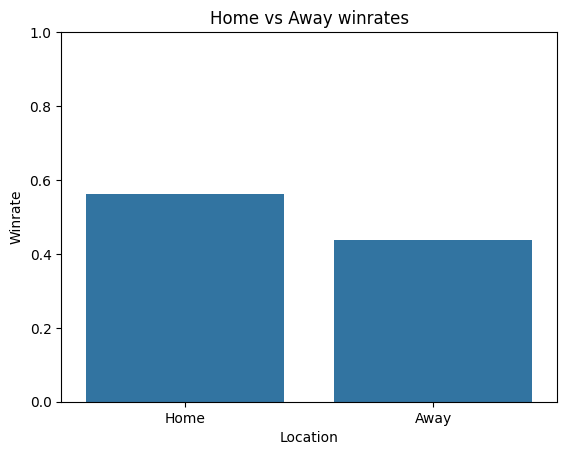

In [36]:
sns.barplot(data=rates_df, x='Location',y='Winrate')
plt.title('Home vs Away winrates')
plt.ylim(0,1)
plt.show()


In [29]:
###################################################################################################################